In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
df = pd.read_csv('../data/data_cleaned.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED,COVID
0,2,1,1,1,2,1,65,2,2,2,2,2,1,2,2,2,2,2,1,1
1,2,1,2,1,2,1,72,2,2,2,2,2,1,2,1,1,2,2,1,2
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,2,1,1
3,2,1,1,1,2,2,53,2,2,2,2,2,2,2,2,2,2,2,1,2
4,2,1,2,1,2,2,68,2,1,2,2,2,1,2,2,2,2,2,1,1


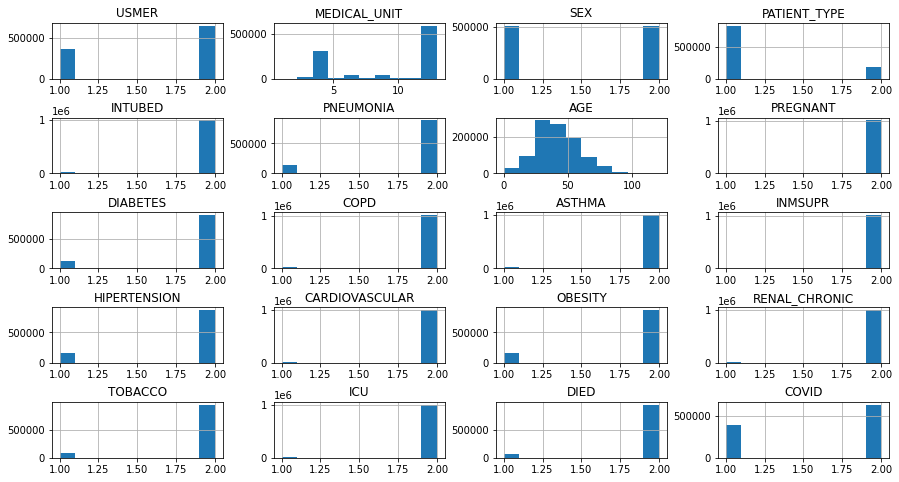

In [3]:
# fig, ax = plt.subplots(figsize = (15,8))
df.hist(figsize = (15,8))
plt.subplots_adjust(hspace = 0.7);
# plt.show()

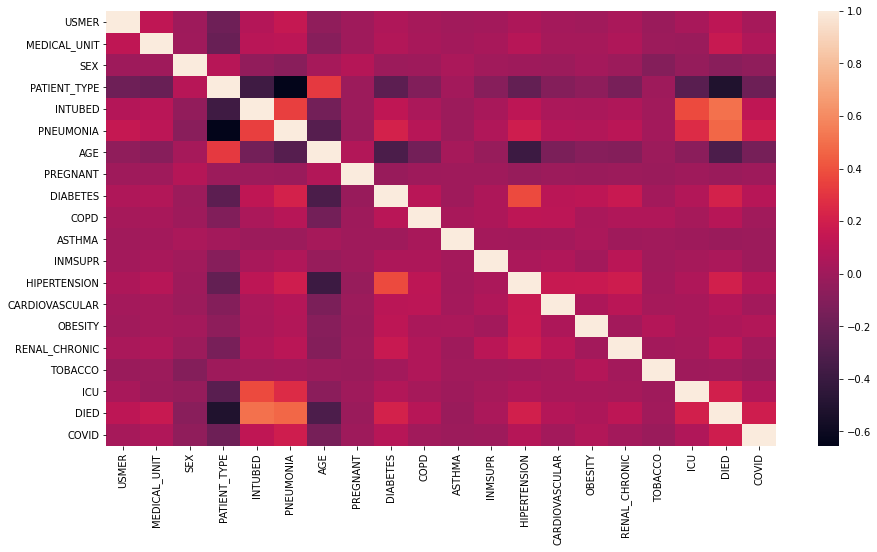

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr())
plt.show()

It seems reasonable to use feature 'DIED' as the dependent variable. The variable 'DIED' is correlated with the majority of the other variables but highlighly correlated with 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', and 'AGE'. 

<!-- I'll use these 4 vairables as independed variables for now.  -->

Should we use only COVID positive data? 

In [5]:
df[['COVID','DIED']].value_counts()

COVID  DIED
2      2       613670
1      2       334839
       1        52320
2      1        21296
Name: count, dtype: int64

* The majority of patients did not have COVID and did not die. 
* We do have some patients with positive COVID test that either died or survived. 
* There are also some patients without COVID symptoms that died. 

If we only want to look at the COVID patients:

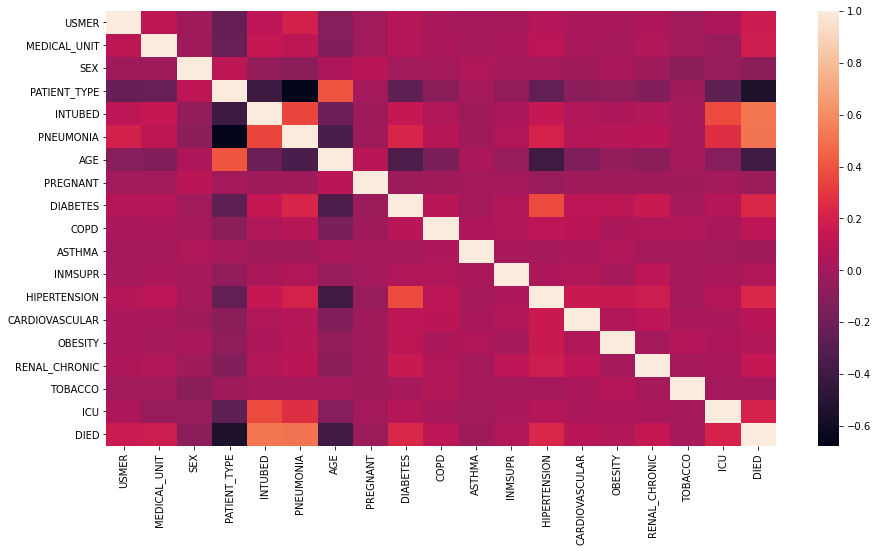

In [6]:
plt.subplots(figsize=(15,8))
sns.heatmap(df[df.COVID == 1].drop(columns=['COVID']).corr())   # filter the data to show only COVID positive patients
plt.show()

Similar pattern can be seen so we will look at the whole data set and use COVID as a feature to predict 'DIED'. This will allow us have a larger training data set. 

## PCA

Looking at the initial heatmap of the correlations, we see that patient type and age are correlated with most of the variables. I'll include the features in the initiall phase then but I decided to use PCA to reduce the dimentsionality as well as correlation between explanatory variables. 

Scale the variables except DIED and convert the result to pandas dataframe

In [7]:
df_scaled = pd.DataFrame(scale(df.drop(columns=['DIED'])), columns = df.drop(columns=['DIED']).columns)
df_scaled.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,COVID
0,0.746984,-2.146622,-1.000862,-0.478053,0.182915,-2.54007,1.380221,0.087697,0.368261,0.119286,0.175091,0.116134,-2.329290,0.141631,0.425236,0.134997,0.29651,0.128081,-1.280650
1,0.746984,-2.146622,0.999138,-0.478053,0.182915,-2.54007,1.798294,0.087697,0.368261,0.119286,0.175091,0.116134,-2.329290,0.141631,-2.351636,-7.407573,0.29651,0.128081,0.780853
2,0.746984,-2.146622,0.999138,2.091818,-5.467020,0.39369,0.782974,0.087697,-2.715465,0.119286,0.175091,0.116134,0.429315,0.141631,0.425236,0.134997,0.29651,0.128081,-1.280650
3,0.746984,-2.146622,-1.000862,-0.478053,0.182915,0.39369,0.663525,0.087697,0.368261,0.119286,0.175091,0.116134,0.429315,0.141631,0.425236,0.134997,0.29651,0.128081,0.780853
4,0.746984,-2.146622,0.999138,-0.478053,0.182915,0.39369,1.559395,0.087697,-2.715465,0.119286,0.175091,0.116134,-2.329290,0.141631,0.425236,0.134997,0.29651,0.128081,-1.280650


Fit the PCA transformation for this data set

In [8]:
rs_pca = PCA().fit(df_scaled)

In [9]:
rs_pca.components_

array([[-1.38753967e-01, -1.53615220e-01,  6.46896003e-02,
         4.47298441e-01, -3.10593474e-01, -4.12836331e-01,
         3.43148018e-01,  3.04123741e-02, -3.06419524e-01,
        -1.42726581e-01,  1.35072080e-03, -8.54648199e-02,
        -3.12594600e-01, -1.45190503e-01, -1.17902988e-01,
        -1.69147007e-01, -2.34880698e-02, -2.27052465e-01,
        -1.79804285e-01],
       [ 1.09417248e-01,  1.43775452e-02, -1.16834792e-01,
        -2.24561714e-01,  3.66749942e-01,  2.53951566e-01,
         2.52753028e-01,  7.62751282e-02, -3.16509125e-01,
        -2.21145608e-01, -9.38576779e-02, -9.02395140e-02,
        -3.96471539e-01, -2.60844227e-01, -2.07516812e-01,
        -2.25545043e-01, -8.77139517e-02,  3.87866355e-01,
         1.08216644e-01],
       [-3.18358270e-01, -3.37117235e-01, -5.39905406e-01,
         7.56257241e-02,  5.49447875e-02, -7.03403374e-03,
        -7.16838624e-02, -3.74788341e-01, -8.50771507e-03,
         6.02124330e-02, -1.59424453e-01, -1.40633014e-01,
    

In [10]:
rs_pca.explained_variance_

array([2.97235814, 1.46488376, 1.16925884, 1.11793284, 1.09311187,
       1.0582741 , 0.9880909 , 0.9702051 , 0.94142548, 0.91020408,
       0.90031673, 0.875557  , 0.83570129, 0.81186434, 0.75241347,
       0.64898902, 0.59786759, 0.56156074, 0.3300033 ])

In [11]:
rs_pca.explained_variance_ratio_.cumsum()

array([0.15643975, 0.23353882, 0.2950787 , 0.35391721, 0.41144936,
       0.46714794, 0.51915267, 0.57021605, 0.61976471, 0.66767014,
       0.71505519, 0.76113709, 0.80512132, 0.84785098, 0.88745165,
       0.92160894, 0.95307562, 0.98263142, 1.        ])

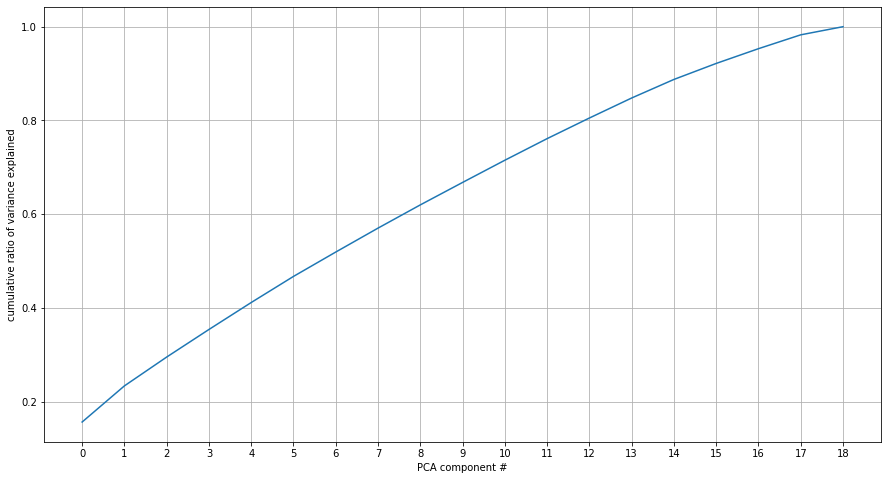

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(rs_pca.explained_variance_ratio_.cumsum())
ax.set_xticks([i for i in range(19)])
ax.set_xlabel('PCA component #')
ax.set_ylabel('cumulative ratio of variance explained')
plt.grid()
plt.show()

About 12 components can explain almost 80% of the variance however we needa at least 14 components to get 90% of the variance explained.

In [14]:
np_pca = rs_pca.transform(df_scaled)
np_pca.shape

(1022125, 19)

In [15]:
np_pca

array([[ 2.10489052e+00,  5.35824506e-01,  9.72418528e-01, ...,
         1.26128242e+00, -1.14890523e+00,  2.21130150e+00],
       [ 3.61026807e+00,  2.90834988e+00,  5.40731996e-01, ...,
         9.58755118e-01,  6.37495987e-01,  2.47013735e+00],
       [ 3.80508407e+00, -1.87065708e+00, -1.84584986e-01, ...,
        -4.18205287e+00,  4.63536106e-01, -1.18689855e+00],
       ...,
       [-9.09946384e-01,  7.19527168e-02, -1.03723684e+00, ...,
        -1.78198285e-01,  7.00718140e-01,  3.98881121e-03],
       [-1.46329524e+00, -3.35628241e-01, -9.21641874e-01, ...,
        -1.76943595e-01, -2.99912444e-01, -6.30023882e-02],
       [-9.71429590e-01,  2.66659436e-02, -1.02439295e+00, ...,
        -1.78058875e-01,  5.89536964e-01, -3.45465539e-03]])

Lt's create a data frame with the first 15 components as well as the target variable and save it so it can be used for the modeling purposes.

In [16]:
df_pca = pd.DataFrame({'PC1': np_pca[:,0], 'PC2': np_pca[:,1], 'PC3': np_pca[:,2], 'PC4': np_pca[:,3],
                       'PC5': np_pca[:,4], 'PC6': np_pca[:,5], 'PC7': np_pca[:,6], 'PC8': np_pca[:,7],
                       'PC9': np_pca[:,8], 'PC10': np_pca[:,9], 'PC11': np_pca[:,10], 'PC12': np_pca[:,11],
                       'PC13': np_pca[:,12], 'PC14': np_pca[:,13], 'PC15': np_pca[:,14], 'DIED': df['DIED']})
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,DIED
0,2.104891,0.535825,0.972419,-1.652835,-0.089341,0.020579,0.091327,0.016455,1.014249,-0.208982,-0.223492,1.544934,-0.358975,-0.958716,-0.433076,1
1,3.610268,2.908350,0.540732,0.905775,-1.357146,-1.269949,-0.199194,3.082603,-1.605943,2.157063,-0.376924,2.325356,3.342385,2.443035,-1.924877,1
2,3.805084,-1.870657,-0.184585,-0.827594,-0.072651,-0.271112,-0.244924,0.317616,0.454374,0.583150,-0.431414,2.585876,-0.942900,0.090368,1.743857,1
3,-0.585197,0.229091,1.137700,-0.261128,-0.414802,-0.016463,-0.079741,-0.340820,-0.089395,-0.520710,-0.190719,2.159516,-0.544751,-0.294466,-0.065439,1
4,2.029504,2.068502,-0.114637,-2.195852,-0.490583,-0.545067,0.011039,0.427774,0.599874,0.817786,-0.667503,1.404901,-1.401350,0.102844,1.896471,1


In [17]:
df_pca.to_csv('../data/pca_feastures_target.csv')